# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Viskoelastická konstrukce

## Zadání
Konstrukce na obrázku je vyrobena z betonu, který budeme v tomto příkladu považovat za lineárně viskoelastický materiál se stárnutím. Všechny pruty mají stejný a po délce konstantní průřez charakterizovaný momentem setrvačnosti $I$.
    
V čase 21 dní po vybetonování došlo ke svislému posunu podpory 5 o $\overline{w}$ směrem nahoru (viz obrázek).
Za další týden, tj. celkem 28 dní od vybetonování, byla konstrukce zatížena vodorovnou silou $F$.
Ve stáří 100 dní byla provedena rektifikace podpory 5 o $\overline{w}$ směrem dolů (výsledný posun této podpory byl tedy od této chvíle nulový).

**Vyjádřete	natočení styčníku 3	a svislou reakci ve styčníku 4 v časech 25 dní, 50 dní a 200 dní po vybetonování.**

Do obrázku zakreslete Vámi uvažovanou kladnou orientaci reakce a natočení.
Výpočet proveďte obecně (bez dosazování konkrétních hodnot).
Výsledek vyjádřete pomocí symbolů $L$, $H$, $I$, $F$, $\overline{w}$ a pomocí funkce poddajnosti $J(t,t')$, případně relaxační funkce $R(t,t')$.  
(Zatížení vlastní tíhou a vliv stlačení nebo protažení střednice zanedbejte.)


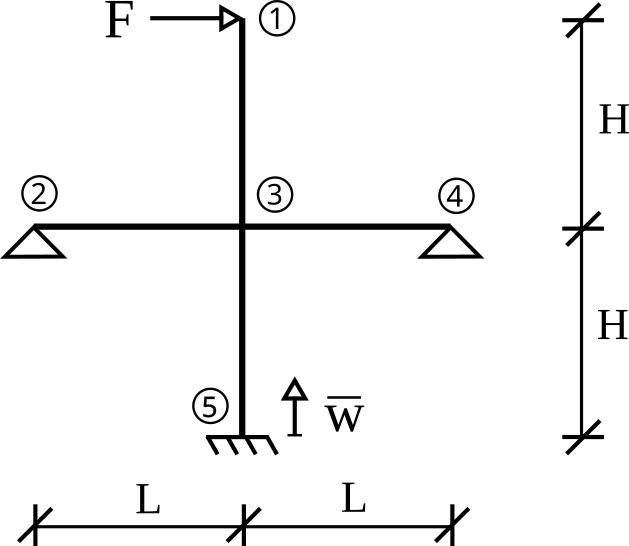

In [ ]:
from IPython.display import display, Image
display(Image(filename="Viskoelasticita_konstrukce_Priklad_2_zadani.png", width=300))

Import potřebných knihoven

In [ ]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

## Řešení

Nejprve zvolíme a zakreslíme kladnou orientaci reakce $R_{z4}$ a pootočení $\varphi_3$

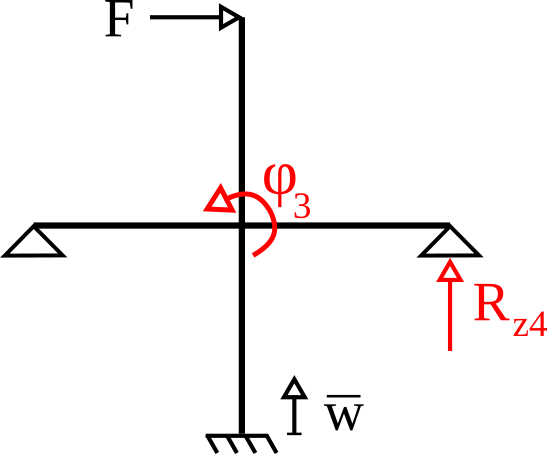

In [ ]:
from IPython.display import display, Image
display(Image(filename="Viskoelasticita_konstrukce_Priklad_2_volba_smeru.png", width=250))

### Analytické řešení

**Definice proměnných**

In [ ]:
t = smp.symbols('t', real = True, positive = True)
tt = smp.symbols('tt', real = True, positive = True)

I = smp.symbols('I', real = True, positive = True)
E = smp.symbols('E', real = True, positive = True)

L = smp.symbols('L', real = True, positive = True)
H = smp.symbols('H', real = True, positive = True)

F = smp.symbols('F', real = True, positive = True)
w = smp.symbols(r'\overline{w}', real = True, positive = True)
phi_3 = smp.symbols(r'\varphi_3', real = True)

#J = smp.symbols(r'J(t,tt)', real = True, positive = True)
#R = smp.symbols(r'R(t,tt)', real = True, positive = True)
R = smp.Function('R') # Definice R jako funkce
J = smp.Function('J') # Definice J jako funkce

M_31 = smp.symbols(r'M_{31}', real = True)
M_32 = smp.symbols(r'M_{32}', real = True)
M_34 = smp.symbols(r'M_{34}', real = True)
M_35 = smp.symbols(r'M_{35}', real = True)

Z_43 = smp.symbols(r'Z_{43}', real = True)

J_40_30 = smp.symbols(r'J(40,30)', real = True, positive = True)


##Řešení podle pružnosti

Pro řešení použijeme zjednodušenou deformační metodu. Pro danou konstrukci bude jedinou deformační neznámou pootočení styčníku 3.

Hodnoty koncových sil a momentů určíme z tabulek deformační metody.

Řešit budeme samostatně 2 zatěžovací stavy - zatížení silou $F$ a pokles podpory $\overline w$.


**1. ZS: zatížení silou $F$**


In [ ]:
## Pootočení phi_3_F:
# Momentová podmínka rovnováhy ve styčníku 3:
# M_31 + M_32 + M_34 + M_35 = 0
M_31 = F * H
M_32 = 3 * E * I / L * phi_3
M_34 = 3 * E * I / L * phi_3
M_35 = 4 * E * I / H * phi_3

# Momentová podm. rovnováhy
podm_M5 = smp.Eq(M_31 + M_32 + M_34 + M_35, 0)  # Rovnice = 0

# Řešení pro phi_3
phi_3_F = smp.solve(podm_M5, phi_3)

# Výstup
print("Pootočení phi_3 od F:")
display(smp.Eq(smp.symbols(r'\varphi_{3}^F'), phi_3_F[0]))
print("\n")

## Svislá reakce R_z4_F:
# Rovnice DM pro koncovou sílu Z_43:
Z_43_F = 3 * E * I / L**2 * phi_3_F[0]  # Použití již vypočítaného phi_3_F[0]
R_z4_F = -Z_43_F

# Výstup
print("Reakce R_z4 od F:")
display(smp.Eq(smp.symbols(r'R_{z4}^F'), R_z4_F))


Pootočení phi_3 od F:


Eq(\varphi_{3}^F, -F*H**2*L/(2*E*I*(3*H + 2*L)))



Reakce R_z4 od F:


Eq(R_{z4}^F, 3*F*H**2/(2*L*(3*H + 2*L)))

**1. ZS: pokles $\underline{w}$**


Ze symetrie platí pro zatížení poklesem podpory 5:  
$\varphi_3^w = 0$

In [ ]:
## Pootočení phi_3_F:
phi_3_w = 0

# Výstup
print("Pootočení phi_3 od w:")
display(smp.Eq(smp.symbols(r'\varphi_{3}^w'), phi_3_w))
print("\n")

## Svislá reakce R_z4_w:
# Rovnice DM pro koncovou sílu Z_43:
Z_43_w = 3 * E * I / L**3 * w
R_z4_w = -Z_43_w

# Výstup
print("Reakce R_z4 od w:")
display(smp.Eq(smp.symbols(r'R_{z4}^w'), R_z4_w))


Pootočení phi_3 od w:


Eq(\varphi_{3}^w, 0)



Reakce R_z4 od w:


Eq(R_{z4}^w, -3*E*I*\overline{w}/L**3)

##Viskoelastické řešení

V případě materiálu se stárnutím bude funkce poddajnosti i relaxační funkce záviset nejen na čase $t$, pro který je vyhodnocení prováděno, ale i na stáří betonu v okamžiku počátku působení $t'$ daného zatěžovacího stavu.  
Rektifikaci uvažujeme jako nový zatěžovací stav - posun podpory 5 o $-\overline w$.

- **pro čas $t = 25$ dní:**  
(pouze posun $\overline w$)


In [ ]:
t = 25  # Čas ke kterému vyhodnocujeme
tt = 21 # stáří betonu při posunu podpory

phi_3_25 = phi_3_w
R_z4_25 = R_z4_w.subs({E: R(t, tt)})

print("Pootočení phi_3 pro čas t = 25 dní:")
display(smp.Eq(smp.symbols(r'\varphi_{3}(t=25)'), phi_3_25))
print("\n")

print("Reakce R_z4 pro čas t = 25 dní:")
display(smp.Eq(smp.symbols(r'R_{z4}(t=25)'), R_z4_25))


Pootočení phi_3 pro čas t = 25 dní:


Eq(\varphi_{3}(t=25), 0)



Reakce R_z4 pro čas t = 25 dní:


Eq(R_{z4}(t=25), -3*I*\overline{w}*R(25, 21)/L**3)

- **pro čas $t = 50$ dní:**  
(posun $\overline w$ i síla $F$)

In [ ]:
t = 50  # čas ke kterému vyhodnocujeme
tt_w = 21 # stáří betonu při posunu podpory
tt_F = 28 # síla od stáří 28 dní

phi_3_50 = phi_3_w + phi_3_F[0].subs({E: 1/J(t, tt_F)})
R_z4_50 = R_z4_w.subs({E: R(t, tt)}) + R_z4_F

print("Pootočení phi_3 pro čas t = 50 dní:")
display(smp.Eq(smp.symbols(r'\varphi_{3}(t=50)'), phi_3_50))
print("\n")

print("Reakce R_z4 pro čas t = 50 dní:")
display(smp.Eq(smp.symbols(r'R_{z4}(t=50)'), R_z4_50))

Pootočení phi_3 pro čas t = 50 dní:


Eq(\varphi_{3}(t=50), -F*H**2*L*J(50, 28)/(2*I*(3*H + 2*L)))



Reakce R_z4 pro čas t = 50 dní:


Eq(R_{z4}(t=50), 3*F*H**2/(2*L*(3*H + 2*L)) - 3*I*\overline{w}*R(50, 21)/L**3)

- **pro čas $t = 200$ dní:**  
(posun $\overline w$, síla $F$ a rektifikace, tj. posun o $-\overline w$)

In [ ]:
t = 200  # čas ke kterému vyhodnocujeme
tt_w = 21  # stáří betonu při posunu podpory
tt_F = 28  # síla od stáří 28 dní
tt_rekt = 100  # čas rektifikace

# Pootočení phi_3 pro čas t = 200 dní:
phi_3_200 = phi_3_w + phi_3_F[0].subs({E: 1/J(t, tt_F)}) - phi_3_w

# Reakce R_z4 pro čas t = 200 dní:
R_z4_200 = R_z4_F + R_z4_w.subs({E: R(t, tt_w)}) - R_z4_w.subs({E: R(t, tt_rekt)})

# Výpis pro phi_3 a R_z4
print("Pootočení phi_3 pro čas t = 200 dní:")
display(smp.Eq(smp.symbols(r'\varphi_{3}(t=200)'), phi_3_200))
print("\n")

print("Reakce R_z4 pro čas t = 200 dní:")
display(smp.Eq(smp.symbols(r'R_{z4}(t=200)'), R_z4_200))

Pootočení phi_3 pro čas t = 200 dní:


Eq(\varphi_{3}(t=200), -F*H**2*L*J(200, 28)/(2*I*(3*H + 2*L)))



Reakce R_z4 pro čas t = 200 dní:


Eq(R_{z4}(t=200), 3*F*H**2/(2*L*(3*H + 2*L)) - 3*I*\overline{w}*R(200, 21)/L**3 + 3*I*\overline{w}*R(200, 100)/L**3)